<a href="https://colab.research.google.com/github/DiniruKarunarathne/Cat-and-Dog-Image-Classification/blob/main/Cat_and_Dog_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs & Cats Image Classification**

🐕 🐈



---






CNN Network , Tensorflow , numpy , matplotlib

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt

Load and Unzip the Dataset

In [ ]:
local_zip = 'kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

Flow Data from Directory

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'data/PetImages',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.


Build the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    verbose=1
)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5919 - loss: 0.6695
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6723 - loss: 0.6291
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6448 - loss: 0.6260
Epoch 4/15
 65/100 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6774 - loss: 0.6066

Visualize Training Results

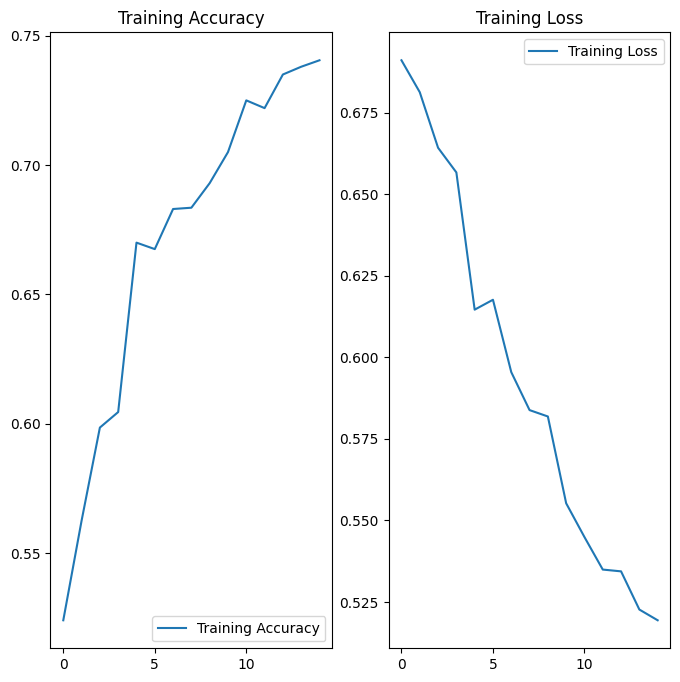

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()



---


## **Upload an Image** ⬇



---



In [ ]:
from google.colab import files

# This will prompt you to upload an image file from your computer
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    print('Uploaded image:', img_path)

Saving 360_F_610716498_li6BIgt75TXw8B4W89pbf3VtKgHNQkXo-1.jpg to 360_F_610716498_li6BIgt75TXw8B4W89pbf3VtKgHNQkXo-1 (1).jpg
Uploaded image: /content/360_F_610716498_li6BIgt75TXw8B4W89pbf3VtKgHNQkXo-1 (1).jpg


Preprocess the Image

In [ ]:
from PIL import Image

img = Image.open(img_path)
img = img.resize((150, 150))
img = img.convert('RGB')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, 0)

Make a prediction and visualize result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted: This is Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


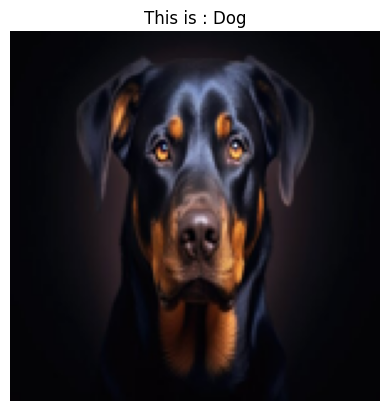

In [ ]:
prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("Predicted: This is Cat")
else:
    print("Predicted: This is Dog")



prediction = model.predict(img_array)
if prediction[0] < 0.5:
    pred_label = "Cat"
else:
    pred_label = "Dog"

plt.imshow(img)
plt.axis('off')
plt.title(f'This is : {pred_label}')
plt.show()